# 텐서플로우 2.0 불러오기

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# 오늘 사용할 데이터 불러오기 
 * fashion_mnist - 의류 이미지/ 10개의 범주 / 흑백처리 / 28 * 28
 


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


#데이터의 수 확인하기
* 학습 데이터 수 6만개
* 테스트 데이터 수 1만개


In [ ]:
print(len(train_X), len(test_X))

60000 10000


# 이미지 확인
* cmap = '  ' 을 통해 이미지의 출력 색상 선택  
* plt.colorbar() : 우측에 색상값의 정보를 바(bar)형태로 출력
  * 색상값은 0 ~ 255의 값을 가지고 있음을 확인 
* print(train_Y[2]) 로 확인결과 이 이미지는 **0번 티셔츠/상의**

0. 티셔츠/상의 
1. 바지
2. 스웨터
3. 드레스
4. 코트
5. 샌들
6. 셔츠
7. 운동화
8. 가방
9. 부츠


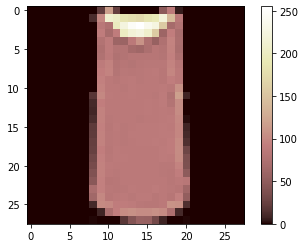

정답 범주 :  0


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_X[2], cmap = 'pink')
plt.colorbar()
plt.show()

# 정답 범주 확인 
print("정답 범주 : ",train_Y[2])

# 데이터 정규화 이전의 [이미지 픽셀 행렬]

In [ ]:
print(train_X[2])

[[  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48
   88   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12 100 212 205 185 179 173 186 193 221
  142  85   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  85  76 199 225 248 255 238 226 157
   68  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91  69  91 201 218 225 209 158  61
   93  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79  89  61  59  87 108  75  56  76
   97  73   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  75  89  80  80  67  63  73  83  80
   96  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77  88  77  80  83  83  83  83  81
   95  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89  96  80  83  81  84  85  85  85
   97  84   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  93  97  81  85  84  85  8

#  Min-Max Normalization 데이터 정규화 작업
###### 최소-최대 정규화는 데이터를 정규화하는 가장 일반적인 방법.
###### 모든 feature에 대해 각각의 최소값 0, 최대값 1.
###### 모든 값들을 0 과 1 사이의 값으로 변환.

* (X - MIN) / (MAX-MIN) 
*  바로 위의 작업을 통해 이미지의 최소값은 0, 최대값은 255 임을 확인
* ( X - 0 ) / ( 255 - 0 )    

In [ ]:
train_X = train_X / 255.0
test_X = test_X / 255.0

In [ ]:
print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

# 다층 퍼셉트론 신경망 구축 
###### 원본 데이터가 28*28 의 2차원 array. 
###### Flatten을 활용하면 다차원 이미지를 1차원으로 평평하게 바꿔주는 단순레이어
* Flatten 레이어는 다차원 이미지를 1차원으로 평평하게 바꿔주는 단순 레이어
 * input_shape : 원본 데이터의 크기를 입력
* Dense 레이어는 완전연결 레이어 
* 마지막 레이어의 units값 10. 즉 정답 범주의 수와 동일.  

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# 컴파일 단계
 * Adam의 기본값 : lr = 0.0001
 * spares_categorical_crossentropy : 희소행렬을 나타내는 데이터를 전처리 없이 정답행렬로 사용가능.
  * 희소행렬 : 대부분이 값이 0인 행렬 
  * ex) [0,0,0,0,0,0,1], [0,0,0,1,0,0,0,0]


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# 신경망 학습 단계

In [ ]:
history = model.fit(train_X,train_Y,
                    epochs = 500, 
                    validation_split = 0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5213 - accuracy: 0.8163 - val_loss: 0.4372 - val_accuracy: 0.8483
Epoch 2/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3870 - accuracy: 0.8607 - val_loss: 0.4003 - val_accuracy: 0.8529
Epoch 3/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3469 - accuracy: 0.8749 - val_loss: 0.3604 - val_accuracy: 0.8705
Epoch 4/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3199 - accuracy: 0.8825 - val_loss: 0.3551 - val_accuracy: 0.8735
Epoch 5/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3006 - accuracy: 0.8897 - val_loss: 0.3467 - val_accuracy: 0.8769
Epoch 6/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2865 - accuracy: 0.8938 - val_loss: 0.3237 - val_accuracy: 0.8843
Epoch 7/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2734 - accuracy: 0.8993 - val_loss: 0.3269 - val_ac

# 정확도 및 손실값에 대한 결과 시각화 
* 검증데이터와 학습데이터 비교
* 과적합 혹은 과소적합 확인


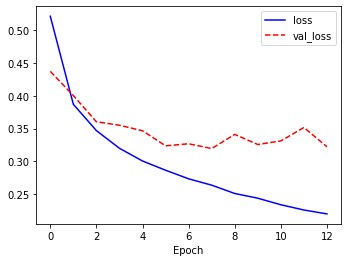

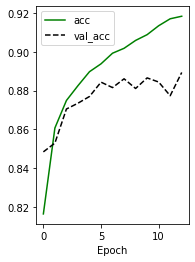

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 최종 평가
* evaluate() : 최종 정확도 및 손실값 확인

In [ ]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8842


[0.34667664766311646, 0.8841999769210815]

# 예측
* predict() : 학습된 신경망을 활용하여 예측을 수행
0. 티셔츠/상의 
1. 바지
2. 스웨터
3. 드레스
4. 코트
5. 샌들
6. 셔츠
7. 운동화
8. 가방
9. 부츠

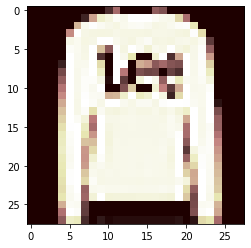

[[1.0000044 1.        1.9997191 1.        1.0002431 1.        1.0000334
  1.        1.        1.       ]]
예측 수행 범주 : 2


In [ ]:
#예측 수행
pred_X = model.predict(test_X[[1]])
#예측 이미지 확인 
plt.imshow(test_X[1], cmap = 'pink')
plt.show()

#예측 결과 확인 
print(pred_X+1)
print("예측 수행 범주 :",test_Y[1])

------

# 합성곱 신경망을 활용한 이미지 판별
 * 실험 1. 합성곱 계층만 사용한 경우
 * 실험 2. 풀링 계층과 정규화 기법인 드랍아웃을 함께 사용한 경우 
 * 실험 3. VGGNet 스타일 구축
 * 실험 4. VGGNet + 이미지 보강 

* 합성곱 연산을 진행하기 위한 4차원 (미니배치 데이터, 입력 이미지 행, 입력 이미지 열, 입력 채널 수 )
* reshape() : 기존 3차원 에서 채널이 추가된 4차원 형태로 차원 변경 

In [ ]:
print(train_X.shape, test_X.shape)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape,test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


# 분류 대상 이미지 및 범주 확인  
###### plt.subplot(4,4,i+1) : (행,열, 순서)
######  plt.imshow(train_X[i].reshape(28,28), cmap='pink') 
###### : reshape(28,28)을 통해 기존의 4차원에서 다시 2차원으로 변경하여 이미지 출력

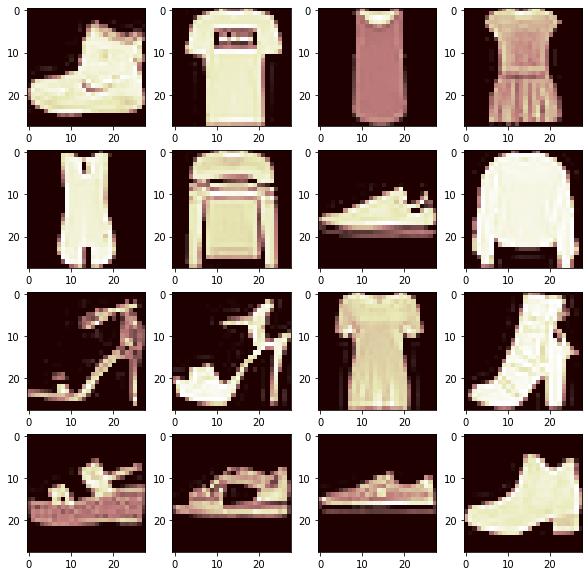

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(train_X[i].reshape(28,28), cmap='pink')

plt.show()
print(train_Y[:16])

# 실험 1. 합성곱 계층만 사용   
* 풀링 레이어 없이, 단순 합성곱 계층만 활용
* tf.keras.layers.Conv2D()
 * input_shape : 입력 이미지의 크기 및 채널
 * kernel_size : 커널 사이즈 
 * filters : 몇 개의 필터를 생성할 것 인지 
 * strides : 건너뛰기 (기본값 (1,1))
 * padding : 패딩 방식(기본값 'valid')
* tf.keras.layers.Flatten() : 다차원 레이어를 1차원으로 펼쳐준다.

In [ ]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=16, strides = (1,1),padding = 'valid'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

# 컴파일 단계 

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

# 신경망 학습 단계 
* GPU로 설정하여 수행하는 것을 권해드립니다. 


In [ ]:
history = model.fit(train_X,train_Y,
                    epochs=500,
                    validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')])

# 정확도 및 손실값에 대한 결과 시각화 

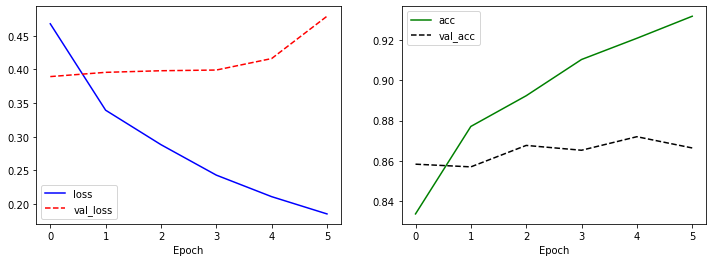

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# 최종 평가
* 다층 퍼셉트론의 결과       loss: 0.5899 - accuracy: 0.8197
* 합성곱 계층만 사용한 결과  loss: 0.5002 - accuracy: 0.8683

In [ ]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.5002 - accuracy: 0.8683


[0.500231921672821, 0.8683000206947327]

# 실험 2. 합성곱, 풀링, 드랍아웃 사용    
* 최대치 풀링 : tf.keras.layers.MaxPool2D() 
 * strides : 건너뛰기
 * pool size : 풀링 사이즈 설정 - 기본값 : (2,2) 
* 평균치 풀링 : tf.keras.layers.AveragePool2D()
* 드랍아웃 계층 생성 : tf.keras.layers.Dropout() 
 * rate : 이전 계층에서 제외할 뉴런의 비율 설정

In [ ]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32),
    tf.keras.layers.MaxPool2D(strides = (2,2),pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 64),
    tf.keras.layers.AvgPool2D(strides = (2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

# 컴파일 단계

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

# 신경망 학습 단계

In [ ]:
history = model.fit(train_X,train_Y,
                    epochs=500,
                    validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')])

Epoch 1/500
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5654 - accuracy: 0.7961 - val_loss: 0.3987 - val_accuracy: 0.8565
Epoch 2/500
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4063 - accuracy: 0.8531 - val_loss: 0.3660 - val_accuracy: 0.8669
Epoch 3/500
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3687 - accuracy: 0.8682 - val_loss: 0.3526 - val_accuracy: 0.8742
Epoch 4/500
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3451 - accuracy: 0.8754 - val_loss: 0.3386 - val_accuracy: 0.8783
Epoch 5/500
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3263 - accuracy: 0.8813 - val_loss: 0.3287 - val_accuracy: 0.8797
Epoch 6/500
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3146 - accuracy: 0.8884 - val_loss: 0.3081 - val_accuracy: 0.8909
Epoch 7/500
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3007 - accuracy: 0.8918 - val_loss: 0.3008 - val_ac

# 정확도 및 손실값에 대한 결과 시각화 

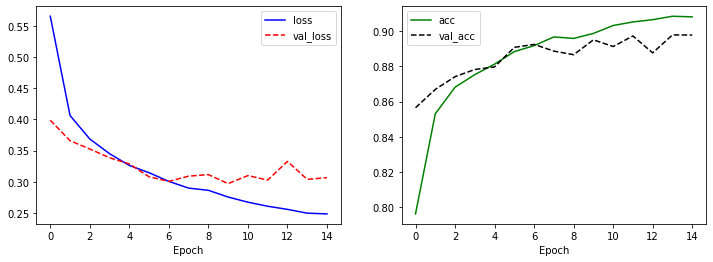

In [ ]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.3248 - accuracy: 0.8921


[0.32476094365119934, 0.8920999765396118]

# 최종 평가 
* 다층 퍼셉트론 →  loss: 0.5899 - accuracy: 0.8197
* 합성곱 계층만 사용 → loss: 0.5002 - accuracy: 0.868
* 합성곱, 풀링, 드롭아웃 사용 → loss: 0.3248 - accuracy: 0.8921

# 실험 3. VGGNet 스타일 적용
# Style Transfer 논문에서도 VGGNet활용 

* VGGNet 스타일 일부 적용
  * 합성곱 계층 2개 적용 / 풀링 레이어 삽입
  * 합성곱 계층 2개 적용 / 풀링 레이어 삽입
  * 완전연결계층 적용 
  * 완전연결계층 적용 
  * 완전연결계층 적용 

###### VGGNet 참고 문헌 : https://arxiv.org/pdf/1709.01921.pdf
###### Style Transfer 참고 문헌 : https://arxiv.org/pdf/1508.06576.pdf

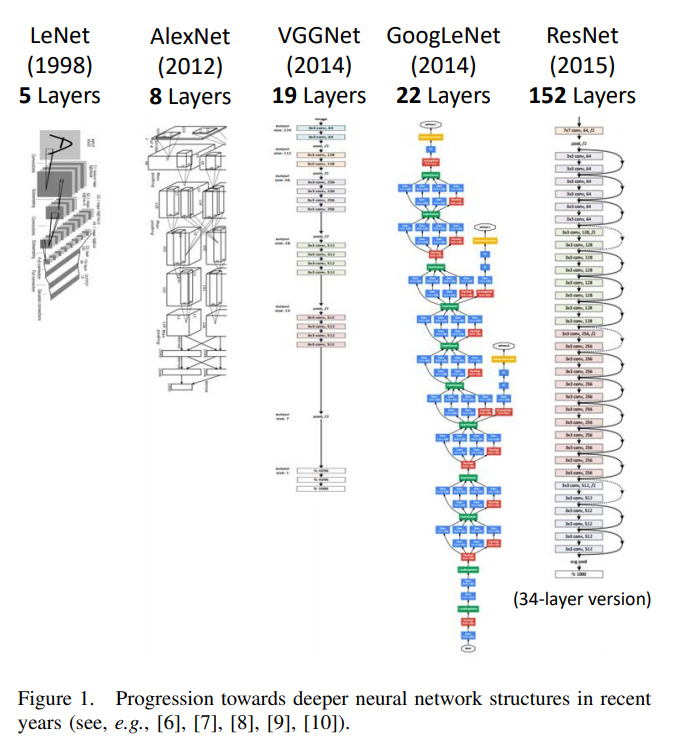

In [ ]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

# 컴파일 단계

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)        

# 신경망 학습 단계 

In [ ]:
history = model.fit(train_X,train_Y,
                    epochs=500,
                    validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')])

# 정확도 및 손실값에 대한 결과 시각화 

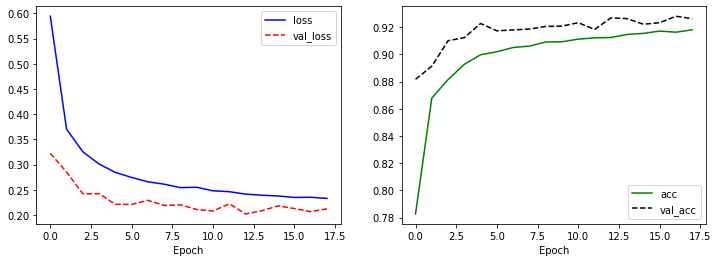

In [ ]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# 최종 평가
* 다층 퍼셉트론 →  loss: 0.5899 - accuracy: 0.8197
* 합성곱 계층만 사용 → loss: 0.5002 - accuracy: 0.868
* 합성곱, 풀링, 드롭아웃 사용 → loss: 0.3248 - accuracy: 0.8921
* VGGNet스타일 기법 → loss: 0.2306 - accuracy: 0.9175

In [ ]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 1s 4ms/step - loss: 0.2306 - accuracy: 0.9175


[0.23063001036643982, 0.9175000190734863]

# 실험 4. VGGNet + 이미지 보강

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 이미지 추가 생성 연습
* rotation_range : 이미지 회전값
* zoom_range : 이미지 일부 확대
* shear_range : 이미지 기울기
* width_shift_range : 좌우 이동
* height_shift_range : 상하 이동 
* horizontal_flip : 이미지 가로 뒤집기
* vertical_filp : 이미지 세로 뒤집기 

In [ ]:
#이미지 보강 조건 설정
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False)
#한번에 생성할 이미지의 수
augment_size = 100 
#flow()를 통해 실제 보강 이미지 생성 

x_augment = image_generator.flow(x = np.tile(A = train_X[0].reshape(28*28),reps = 100).reshape(-1,28,28,1), #np.tile() : A를 reps에 정해진 형식만큼 반복
                                 y = np.zeros(augment_size), #라벨값은 딱히 줄 필요 없기에 np.zeros() 할당
                                 batch_size = augment_size,  #배치 사이즈 
                                 shuffle = False).next()[0]  #next()로 첫번째 데이터[0]에 대한 실제 값을 꺼내준다. 

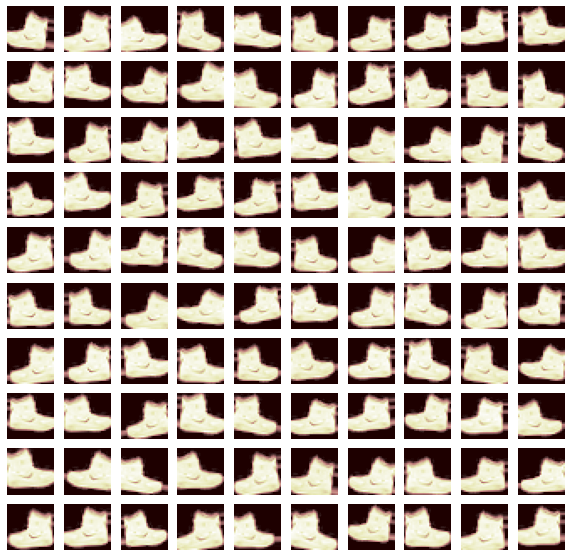

In [ ]:
#이미지 보강 확인
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(x_augment[i].reshape(28,28), cmap='pink')
plt.show()

# 이미지 추가 생성
* 훈련 데이터의 50% 추가생성 ( 60000 + 30000 )

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False)

augment_size = 30000

In [ ]:
# 원본 이미지 무작위 선택 및 데이터 복사
x_choice = np.random.choice(train_X.shape[0], size = augment_size, replace=False)
x_augmented = train_X[x_choice].copy()
y_augmented = train_Y[x_choice].copy()
# 보강 이미지 데이터 생성
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),batch_size = augment_size, shuffle = False).next()[0]  

In [ ]:
# 이미지를 변형할 원본 이미지를 찾기 위한 함수 예제 (중복허용O / 중복허용x)
print(np.random.randint(train_X.shape[0], size = augment_size))
print(np.random.choice(train_X.shape[0], size = augment_size, replace=False))

[29070 34850 10188 ... 24394 52882 57093]
[10501 45039 52514 ... 58159 54677 38462]


In [ ]:
x_augmented_1 = image_generator.flow(x = x_augmented, 
                                 y = np.zeros(augment_size),
                                 batch_size = augment_size,  
                                 shuffle = False).next()[1]   

In [ ]:
print(x_augmented.shape)
print(x_augmented_1.shape)

(30000, 28, 28, 1)
(30000,)


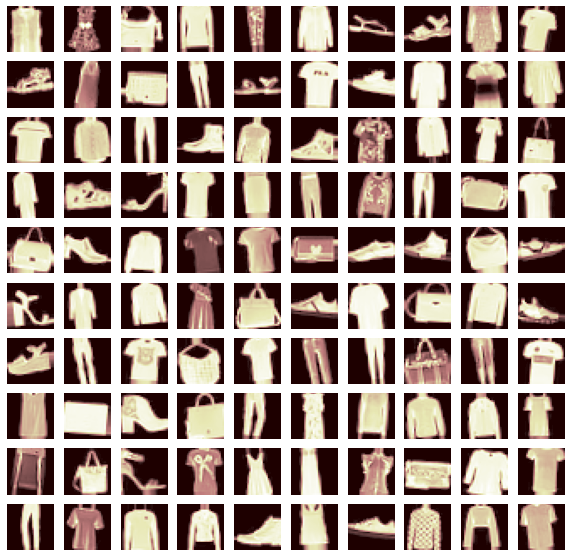

In [ ]:
#보강 이미지 확인
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(x_augmented[i].reshape(28,28), cmap='pink')
plt.show()

In [ ]:
#데이터 합쳐주기
train_X = np.concatenate((train_X,x_augmented))
train_Y = np.concatenate((train_Y,y_augmented))

In [ ]:
#보강 데이터 결합 확인
print(train_X.shape)

(90000, 28, 28, 1)


# 신경망 모델 생성
* 가장 성능이 좋았던 VGGNet 스타일 적용


In [ ]:
model= tf.keras.Sequential([
                            tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
                            tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
                            tf.keras.layers.MaxPool2D(strides = (2,2)),
                            tf.keras.layers.Dropout(rate=0.5),
                            tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'),
                            tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'),
                            tf.keras.layers.MaxPool2D(strides = (2,2)),
                            tf.keras.layers.Dropout(rate=0.5),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(units=512, activation = 'relu'),
                            tf.keras.layers.Dropout(rate = 0.5),
                            tf.keras.layers.Dense(units=256, activation = 'relu'),
                            tf.keras.layers.Dropout(rate = 0.5),
                            tf.keras.layers.Dense(units=10, activation = 'softmax')
])

# 컴파일 단계

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 신경망 학습 단계

In [ ]:
history = model.fit(train_X,train_Y,
                    epochs=500,
                    validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 10 , monitor = 'val_loss')])

Epoch 1/500
2110/2110 [==============================] - 17s 8ms/step - loss: 0.5772 - accuracy: 0.7860 - val_loss: 0.5670 - val_accuracy: 0.7875
Epoch 2/500
2110/2110 [==============================] - 17s 8ms/step - loss: 0.3836 - accuracy: 0.8611 - val_loss: 0.5058 - val_accuracy: 0.8055
Epoch 3/500
2110/2110 [==============================] - 17s 8ms/step - loss: 0.3387 - accuracy: 0.8762 - val_loss: 0.4804 - val_accuracy: 0.8180
Epoch 4/500
2110/2110 [==============================] - 17s 8ms/step - loss: 0.3210 - accuracy: 0.8856 - val_loss: 0.4447 - val_accuracy: 0.8347
Epoch 5/500
2110/2110 [==============================] - 17s 8ms/step - loss: 0.3057 - accuracy: 0.8900 - val_loss: 0.4279 - val_accuracy: 0.8357
Epoch 6/500
2110/2110 [==============================] - 16s 8ms/step - loss: 0.2956 - accuracy: 0.8938 - val_loss: 0.4219 - val_accuracy: 0.8409
Epoch 7/500
2110/2110 [==============================] - 17s 8ms/step - loss: 0.2906 - accuracy: 0.8947 - val_loss: 0.4250 -

# 정확도 및 손실값에 대한 결과 시각화 

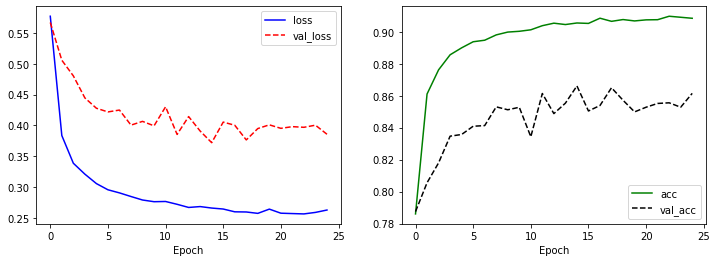

In [ ]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# 최종 평가
* 다층 퍼셉트론 →  loss: 0.5899 - accuracy: 0.8197
* 합성곱 계층만 사용 → loss: 0.5002 - accuracy: 0.868
* 합성곱, 풀링, 드롭아웃 사용 → loss: 0.3248 - accuracy: 0.8921
* VGGNet스타일 기법 → loss: 0.2306 - accuracy: 0.9175
* VGGNet + 이미지 보강 → loss: 0.2097 - accuracy: 0.9262

In [ ]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.2097 - accuracy: 0.9262


[0.2096695601940155, 0.9261999726295471]

# 예측 수행 

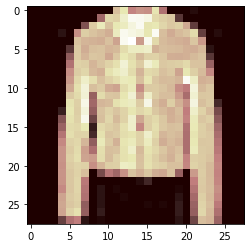

[[1.0000007 1.        1.0031104 1.0000001 1.979995  1.        1.0168937
  1.        1.        1.       ]]
예측 수행 범주 : 4


In [ ]:
#예측 수행
pred_X = model.predict(test_X[[10]])
#예측 이미지 확인 
plt.imshow(test_X[10].reshape(28,28), cmap = 'pink')
plt.show()

#예측 결과 확인 
print(pred_X+1)
print("예측 수행 범주 :",test_Y[10])

In [ ]:
import datetime
# 학습데이터의 log를 저장할 폴더 생성 (지정)
log_dir = "/content/sample_data" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# 텐서보드 콜백 정의 하기
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq = 1)
model.predict(test_X,
              callbacks=[tensorboard_callback])
%load_ext tensorboard
%tensorboard --logdir {log_dir}
